In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option("display.max_columns",None)

In [3]:
non_ev_data = pd.read_csv(r"D:\GitHub_Repository\Research\ma_thesis\py_code\all_cars_output2.csv")
ev_data = pd.read_csv(r"D:\GitHub_Repository\Research\ma_thesis\py_code\ev_cars_output2.csv")
car_sales = pd.read_csv(r"D:\GitHub_Repository\Research\ma_thesis\data\car_sales\all_car_sales.csv")
merged_data = pd.concat([non_ev_data, ev_data], axis=0, ignore_index=True, sort=False)

In [4]:
# including foreing data
car_sales2 = pd.read_csv(r"D:\GitHub_Repository\Research\ma_thesis\data\car_sales\all_car_sales2.csv") 

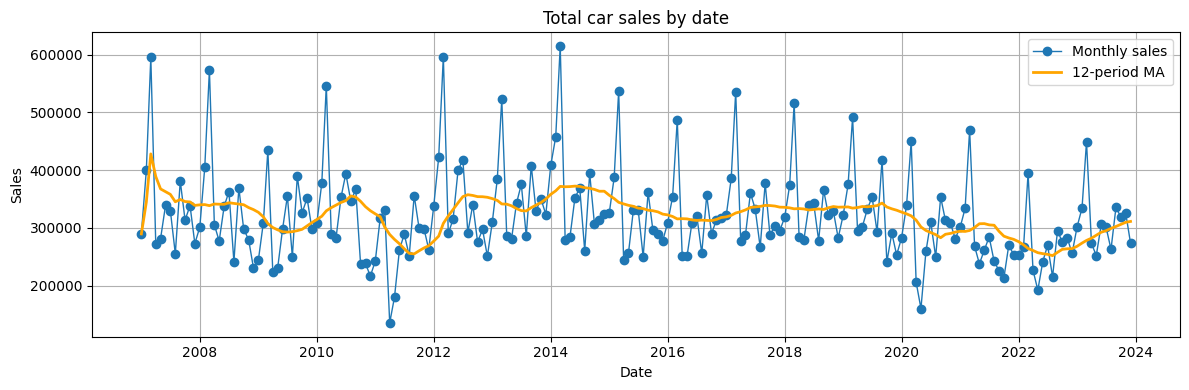

In [105]:
car_sales[['date','sales']].groupby('date').sum().reset_index()
import matplotlib.pyplot as plt

# use the last expression result (the grouped dataframe)
ts = _  
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.sort_values('date')

plt.figure(figsize=(12,4))
plt.plot(ts['date'], ts['sales'], marker='o', linewidth=1, label='Monthly sales')
# optional 12-period rolling average
plt.plot(ts['date'], ts['sales'].rolling(12, min_periods=1).mean(), color='orange', linewidth=2, label='12-period MA')
plt.title('Total car sales by date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
'''
non_ev_data = pd.read_csv("/Users/liberales/github_repository/Research/ma_thesis/py_code/all_cars_output2.csv")
ev_data = pd.read_csv("/Users/liberales/github_repository/Research/ma_thesis/py_code/ev_cars_output2.csv")
car_sales = pd.read_csv("/Users/liberales/github_repository/Research/ma_thesis/data/processed/car_data.csv")
car_sales = car_sales[['Maker','Model','date','year','month','sales','import_flag', 'EV_flag','PHEV_flag','HYBRID_flag','FCV_flag']]
merged_data = pd.concat([non_ev_data, ev_data], axis=0, ignore_index=True, sort=False)
'''

'\nnon_ev_data = pd.read_csv("/Users/liberales/github_repository/Research/ma_thesis/py_code/all_cars_output2.csv")\nev_data = pd.read_csv("/Users/liberales/github_repository/Research/ma_thesis/py_code/ev_cars_output2.csv")\ncar_sales = pd.read_csv("/Users/liberales/github_repository/Research/ma_thesis/data/processed/car_data.csv")\ncar_sales = car_sales[[\'Maker\',\'Model\',\'date\',\'year\',\'month\',\'sales\',\'import_flag\', \'EV_flag\',\'PHEV_flag\',\'HYBRID_flag\',\'FCV_flag\']]\nmerged_data = pd.concat([non_ev_data, ev_data], axis=0, ignore_index=True, sort=False)\n'

In [5]:
mapping = {
    "基本情報_発売年月": "date",
    "基本情報_乗車定員": "capacity",
    "基本情報_新車価格（税込）": "price",
    "基本情報_駆動方式": "drive_system",
    "基本情報_ドア数": "doors",
    "基本情報_車両型式": "model_code",
    "基本情報_燃費（10.15モード）": "fuel_efficiency_1015",
    "基本情報_トランスミッション": "transmission",
    "基本情報_燃費（JC08モード）": "fuel_efficiency_jc08",
    "基本情報_エンジン区分": "engine_type",
    "基本情報_燃費（WLTCモード走行）": "fuel_efficiency_wltc",
    "基本情報_セカンドシート可倒": "second_row_foldable",
    "基本情報_平均実燃費": "real_world_fuel_efficiency",
    "基本情報_サードシート可倒": "third_row_foldable",

    "高さ": "height",
    "幅": "width",
    "長さ": "length",
    "ホイールベース": "wheelbase",

    "寸法・重量_最低地上高": "min_ground_clearance",
    "寸法・重量_トレッド前": "front_tread",
    "寸法・重量_トレッド後": "rear_tread",
    "寸法・重量_車両重量": "weight",

    "エンジン・性能_種類": "engine_category",
    "エンジン・性能_エンジン型式": "engine_model",
    "エンジン・性能_過給機": "turbocharger",
    "エンジン・性能_総排気量": "displacement",
    "エンジン・性能_使用燃料": "fuel_type",
    "エンジン・性能_燃料タンク容量": "fuel_tank_capacity",
    "エンジン・性能_最高出力": "max_output",
    "エンジン・性能_最大トルク": "max_torque",
    "エンジン・性能_最小回転半径": "min_turning_radius",

    "タイヤ・足回り_タイヤサイズ（前）": "tire_size_front",
    "タイヤ・足回り_タイヤサイズ（後）": "tire_size_rear",
    "タイヤ・足回り_ブレーキシステム（前）": "brake_system_front",
    "タイヤ・足回り_ブレーキシステム（後）": "brake_system_rear",
    "タイヤ・足回り_サスペンション（前）": "suspension_front",
    "タイヤ・足回り_サスペンション（後）": "suspension_rear",

    "安全装備_ABS（アンチロックブレーキ）": "abs",
    "安全装備_ESC（横滑り防止装置）": "esc",
    "安全装備_TCS（トラクションコントロール）": "tcs",
    "安全装備_運転席エアバッグ": "driver_airbag",
    "安全装備_助手席エアバッグ": "passenger_airbag",
    "安全装備_サイドエアバッグ": "side_airbag",
    "安全装備_アイドルストップ": "idle_stop",
    "安全装備_駐車支援装置": "parking_assist",

    "快適装備_エアコン": "air_conditioner",
    "快適装備_パワーウィンドウ": "power_window",
    "快適装備_クルーズコントロール": "cruise_control",
    "快適装備_オーディオ（CD）": "audio_cd",
    "快適装備_カーナビゲーション": "navigation",
    "快適装備_オーディオ（MD）": "audio_md",
    "快適装備_テレビチューナー": "tv_tuner",
    "快適装備_ステアリング調整": "steering_adjustment",
    "快適装備_シートヒーター": "seat_heater",
    "快適装備_ETC": "etc",
    "快適装備_スマートキー": "smart_key",

    "エクステリア_サンルーフ": "sunroof",
    "エクステリア_フォグランプ": "fog_lamp",
    "エクステリア_ディスチャージヘッドライト": "hid_headlight",
    "エクステリア_ホイール": "wheel",
    "エクステリア_電動ドア": "power_door",

    "インテリア_電動シート": "power_seat",
    "インテリア_シート生地": "seat_material",

    "バッテリー・モーター性能_バッテリー種類": "battery_type",
    "バッテリー・モーター性能_バッテリー電力容量": "battery_capacity",
    "バッテリー・モーター性能_モーター出力": "motor_power",
    "バッテリー・モーター性能_モータートルク": "motor_torque",
    "バッテリー・モーター性能_EV航続距離": "ev_range",
    "バッテリー・モーター性能_充電時間目安": "charging_time",
}

merged_data = merged_data.rename(columns=mapping)

In [6]:
df = merged_data.copy()
df = df.replace("-", np.nan)
# --- 日付: "2020年10月" → datetime ---
df["date"] = (
    df["date"]
    .str.replace("年", "-")
    .str.replace("月", "")
    .pipe(pd.to_datetime)
)
# --- 乗車人数: "2名" → 2 ---
df["capacity"] = (
    df["capacity"]
    .str.replace("名", "")
    .astype(float)
)
# --- 価格: "406.6万円" → 406.6 * 1e4 = 4,066,000 (円)
df["price"] = (
    df["price"]
    .str.replace("万円", "")
    .astype(float)
)
# --- ドア数: "2枚" → 2 ---
df["doors"] = (
    df["doors"]
    .str.replace("枚", "")
    .astype(float)
)
# --- 車両重量: "1,130kg" → 1130 ---
df["weight"] = (
    df["weight"]
    .str.replace(",", "")
    .str.replace("kg", "")
    .astype(float)
)
# --- 排気量: "1,358cc" → 1358 ---
df["displacement"] = (
    df["displacement"]
    .str.replace(",", "")
    .str.replace("cc", "")
    .astype(float)
)
# --- 燃料タンク容量: "45L" → 45 ---
df["fuel_tank_capacity"] = (
    df["fuel_tank_capacity"]
    .str.replace("L", "")
    .astype(float)
)
df['ev_range'] = (
    df['ev_range']
    .str.replace("km","")
    .astype(float)
)
df['battery_capacity'] = (
    df['battery_capacity']
    .str.replace("kW/h","")
    .astype(float)
)

# max_torque
import re
def extract_nm_from_parenthesis(x):
    """max_torque の（250N・m）部分を抽出"""
    if pd.isna(x):
        return None
    m = re.search(r'（([0-9.]+)N・m）', x)
    if m:
        return float(m.group(1))
    return None

def extract_kgm(x):
    """25.5kg・m の数値部分抽出"""
    if pd.isna(x):
        return None
    m = re.search(r'([0-9.]+)kg・m', x)
    if m:
        return float(m.group(1))
    return None
# max_torque(N・m) 抽出
df["torque_nm"] = df["max_torque"].apply(extract_nm_from_parenthesis)
# kgm がある場合は Nm 変換 (1 kgf·m ≈ 9.80665 Nm)
df["torque_kgm"] = df["max_torque"].apply(extract_kgm)
df["torque_from_kgm"] = df["torque_kgm"] * 9.80665
# Nm優先、なければ kgm変換値
df["max_torque_clean"] = df["torque_nm"].fillna(df["torque_from_kgm"])
# motor_torque numeric extraction
df['motor_torque_clean'] = (
    merged_data['motor_torque']
    .replace("-", np.nan)
    .str.extract(r'([0-9.]+)')[0]
    .astype(float)
)
df['torque'] = df['motor_torque_clean'].fillna(df['max_torque_clean'])
df = df.drop(columns=['torque_nm','torque_kgm','torque_from_kgm','max_torque_clean','motor_torque_clean'])

df['fuel_efficiency'] = (
    df['fuel_efficiency_wltc']
        .fillna(df['fuel_efficiency_jc08'])
        .fillna(df['fuel_efficiency_1015'])
        .str.replace("km/L","")
        .astype(float)
)

df['min_turning_radius'] = (
    df['min_turning_radius']
        .str.replace("m","")
        .astype(float)
)

df.loc[df['model']=='ls-hybrid', 'engine_type'] = 'ガソリンHV(PHV)'
df.loc[df['model']=='gs_hybrid', 'engine_type'] = 'ガソリンHV(PHV)'
df.loc[df['model']=='rx_hybrid', 'engine_type'] = 'ガソリンHV(PHV)'
df.loc[df['model']=='hs_hybrid', 'engine_type'] = 'ガソリンHV(PHV)'

df.drop(columns=['fuel_type', 'seat_heater', 'etc','power_seat', 'power_window','idle_stop', 'second_row_foldable', 'third_row_foldable','min_ground_clearance', 'front_tread', 'rear_tread', 'turbocharger','engine_category', 'max_output','tire_size_front','tire_size_rear','brake_system_front','brake_system_rear','suspension_front','suspension_rear', 'abs','esc','tcs','driver_airbag','passenger_airbag','side_airbag', 'audio_md', 'smart_key','sunroof','fog_lamp','hid_headlight','wheel', 'motor_power', 'battery_type', 'max_torque', 'motor_torque','fuel_efficiency_wltc', 'fuel_efficiency_jc08', 'fuel_efficiency_1015', 'real_world_fuel_efficiency'], inplace=True)

In [7]:
df = df.dropna(subset=['price','doors','capacity','height'], axis=0)
df.loc[df['engine_type'].isin(['FCV','EV']), ['fuel_tank_capacity', 'displacement']] = 0
df.loc[~df['engine_type'].isin(['FCV','EV']), ['battery_type', 'battery_capacity', 'ev_range']] = 0
df.loc[df['engine_type']=='その他', 'engine_type'] = '天然ガス'
df.loc[df['engine_type']=='ディーゼル', 'engine_type'] = 'ガソリン'
df.loc[df['engine_type']=='ディーゼルHV(PHV)', 'engine_type'] = 'ガソリンHV(PHV)'
df.loc[df['engine_type'].isin(['EV','FCV']), 'transmission'] = 'no'

# 最頻値で補うカラム
for col in ['weight', 'drive_system', 'transmission', 'min_turning_radius', 'tv_tuner', 'navigation', 'audio_cd', 'air_conditioner', 'parking_assist', 'power_door']:
    group_mode = df.groupby(['model', 'major', 'minor'])[col].transform(
    lambda x: x.mode().iat[0] if x.dropna().shape[0] > 0 else np.nan
)
    df[col] = df[col].fillna(group_mode)

for col in ['ev_range','battery_capacity','displacement','torque','fuel_tank_capacity','fuel_efficiency', 'torque']:
    group_mean = df.groupby(['model','major','minor'])[col].transform('mean')
    # 欠損値を補完
    df[col] = df[col].fillna(group_mean)

df.loc[(df['engine_type'].isin(['EV','FCV']))&(df['ev_range'].notna())&(df['battery_capacity'].notna()), 'fuel_efficiency'] = 3.5/(df['battery_capacity']/df['ev_range'])

# drive_systemを前輪か後輪か全輪かに分類
group_mode = df.groupby(['model', 'major', 'minor'])['drive_system'].transform(
    lambda x: x.mode().iat[0] if x.dropna().shape[0] > 0 else np.nan
)
df['drive_system'] = df['drive_system'].fillna(group_mode)
front_mask = df['drive_system'].str.contains('前輪|FF', na=False, case=False)
rear_mask = df['drive_system'].str.contains('後輪|FR|RR|MR', na=False, case=False)
all_mask = df['drive_system'].str.contains('全輪|AWD|4WD', na=False, case=False)
df.loc[front_mask, 'drive_system'] = 'front'
df.loc[rear_mask, 'drive_system'] = 'rear'
df.loc[all_mask, 'drive_system'] = 'all'

df.loc[df['model'].isin(['abarth_595e_cabriolet','abarth_500e_hatchback','e_nv200_van','e_nv200','minicab_miev_truck','ux_ev','leaf','ek_cross_ev','sakura','clarity_fuel_cell','mx-30_ev_model']), 'drive_system'] = 'front'
df.loc[df['model'].isin(['mirai', 'c_pod','honda_e','i_miev','minicab_ev','minicab-miev']), 'drive_system'] = 'rear'


In [8]:
foreign_cars = ['ABARTH', 'ALFA_ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BMW_ALPINA',
       'BMW_MINI', 'BYD', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN',
       'DODGE', 'DS_AUTOMOBILES', 'FERRARI', 'FIAT', 'FORD', 'HONDA',
       'HUMMER', 'HYUNDAI', 'JAGUAR', 'CHRYSLER_JEEP', 'LAMBORGHINI',
       'LAND_ROVER', 'LOTUS', 'MASERATI', 'MAZDA', 'MERCEDES_BENZ',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUZUKI', 'TOYOTA', 'VOLVO', 'VOLKSWAGEN']
jp_cars = ['toyota', 'nissan', 'honda', 'mazda', 'mitsubishi', 'suzuki', 'subaru', 'daihatsu', 'isuzu', 'lexus', 'abarth', 'chevrolet']

In [9]:
df_jp = df[df['maker'].isin(jp_cars)]
# 年間販売台数12台未満のモデルは削除
yearly_sales_by_model = car_sales.groupby(['Model', 'year'])['sales'].sum().reset_index()
# そのモデルの中で1年でも 12 以上の年があるか判定
valid_models = yearly_sales_by_model.groupby('Model')['sales'].max()
valid_models = valid_models[valid_models >= 12].index
# 元データから該当モデルのみ残す
car_sales_clean = car_sales[car_sales['Model'].isin(valid_models)]
jp_car_sales = car_sales_clean.copy()

--------------------------------

using Lexus data, change df_jp['model'] by matchin w/ gradeid

In [10]:
import json
import csv
with open(r'D:\GitHub_Repository\Research\ma_thesis\py_code\py_codelexus.json', "r", encoding="utf-8") as f:
    data = json.load(f)
rows = []
for car_url, car_info in data.items():
    car_name = car_info.get("car")

    historical_models = car_info.get("historical_models", {})
    for hist_url, hist_info in historical_models.items():

        minor_changes = hist_info.get("minor_changes", {})
        for mc_url, mc_info in minor_changes.items():

            grades = mc_info.get("grades", [])
            for g in grades:
                rows.append({
                    "car_name": car_name,
                    "gradeid": g.get("grade_id"),
                    "grade_name": g.get("grade_name"),
                })
lexus_df = pd.DataFrame(rows)
lexus_df['gradeid'] = pd.to_numeric(lexus_df['gradeid'], errors='coerce')

import re
lexus_df["base_model"] = lexus_df["grade_name"].str.extract(r'^([A-Za-z0-9]+)')
lexus_df.loc[lexus_df["car_name"].str.lower() == "lbx", "base_model"] = "lbx"
lexus_df.loc[lexus_df["car_name"].str.lower() == "gs_f", "base_model"] = "gs_f"
lexus_df.loc[lexus_df["car_name"].str.lower() == "is-f", "base_model"] = "is_f"
lexus_df.loc[lexus_df["car_name"].str.lower() == "lc_convertible", "base_model"] = "lc500"
lexus_df.loc[lexus_df["car_name"].str.lower() == "ct", "base_model"] = "ct200h"
lexus_df.loc[lexus_df['base_model'] == "460L", "base_model"] = "460"
lexus_df.loc[lexus_df['base_model'] == "600hL", "base_model"] = "600h"

lexus_df.loc[lexus_df["car_name"].str.lower() == "rc_f", "base_model"] = "rc_f"
lexus_df.loc[(lexus_df['car_name']=='nx_phev') & (lexus_df['base_model'] =="450h"), "base_model"] = "450hplus"
lexus_df.loc[(lexus_df['car_name']=='rx_phev') & (lexus_df['base_model'] =="450h"), "base_model"] = "450hplus"
lexus_df.loc[lexus_df['base_model'] == "SC430", "base_model"] = "430"
lexus_df.loc[lexus_df['base_model'] =="IS250", "base_model"] = "250"
lexus_df.loc[lexus_df['base_model'] =="IS350", "base_model"] = "350"
lexus_df.loc[lexus_df['base_model'] =="GS350", "base_model"] = "350"
lexus_df.loc[lexus_df['base_model'] =="GS460", "base_model"] = "460"
lexus_df.loc[(lexus_df['base_model'] =="460h")&(lexus_df['car_name']=='gs'), "base_model"] = "460"

lexus_df.loc[lexus_df['car_name'] == 'es_hybrid', 'car_name'] = 'es'
lexus_df.loc[lexus_df['car_name'] == 'is_hybrid', 'car_name'] = 'is'
lexus_df.loc[lexus_df['car_name'] == 'lc_hybrid', 'car_name'] = 'lc'
lexus_df.loc[lexus_df['car_name'] == 'ls-hybrid', 'car_name'] = 'ls'
lexus_df.loc[(lexus_df['car_name'] == 'nx_hybrid')|(lexus_df['car_name'] == 'nx_phev'), 'car_name'] = 'nx'
lexus_df.loc[lexus_df['car_name'] == 'rc_hybrid', 'car_name'] = 'rc'
lexus_df.loc[lexus_df['car_name'] == 'rx_phev', 'car_name'] = 'rx'
lexus_df.loc[lexus_df['car_name'] == 'rx_hybrid', 'car_name'] = 'rx'
lexus_df.loc[(lexus_df['car_name'] == 'ux_ev')|(lexus_df['car_name'] == 'ux_hybrid'), 'car_name'] = 'ux'
lexus_df.loc[lexus_df['car_name'] == 'gs_hybrid', 'car_name'] = 'gs'
lexus_df.loc[lexus_df['car_name'] == 'hs_hybrid', 'car_name'] = 'hs'
lexus_df.loc[lexus_df['car_name'] == 'is-f', 'car_name'] = 'is_f'
lexus_df.loc[lexus_df['car_name'] == 'is-c', 'car_name'] = 'is_c'

special_models = ['lbx', 'lfa', 'gs_f', 'is_f', 'rc_f', 'is_c', 'lc_convertible', 'lx', 'ct', 'hs', ]
lexus_df['model_name'] = np.where(
    lexus_df['car_name'].isin(special_models),
    lexus_df['base_model'],
    lexus_df['car_name'] + lexus_df['base_model']
)
# map(gradeid: model_name) 
lexus_mapping = lexus_df.set_index('gradeid')['model_name']
# replace df_jp's model
df_jp['model'] = df_jp['gradeid'].map(lexus_mapping).fillna(df_jp['model'])

C:\Users\Tsunc\AppData\Local\Temp\ipykernel_14952\2087631340.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jp['model'] = df_jp['gradeid'].map(lexus_mapping).fillna(df_jp['model'])


change phev cars data: ['engine_type'] = 'PHEV'

In [11]:
with open(r'D:\GitHub_Repository\Research\ma_thesis\py_code\py_codephev.json', "r", encoding="utf-8") as f:
    data = json.load(f)

rows = []
for car_url, car_info in data.items():
    car_name = car_info.get("car")

    historical_models = car_info.get("historical_models", {})
    for hist_url, hist_info in historical_models.items():

        minor_changes = hist_info.get("minor_changes", {})
        for mc_url, mc_info in minor_changes.items():

            grades = mc_info.get("grades", [])
            for g in grades:
                rows.append({
                    "car_name": car_name,
                    "gradeid": g.get("grade_id"),
                    "grade_name": g.get("grade_name"),
                })
phev_df = pd.DataFrame(rows)
phev_df['engine_type'] = phev_df['grade_name'].str.contains('プラグイン', na=False).map({True: 'PHEV', False: 'non-PHEV'})
phev_df.loc[(phev_df['car_name'].str.contains('crown')) & (phev_df['grade_name'].str.contains('RS')), 'engine_type'] = 'PHEV'
phev_ids = phev_df[phev_df['engine_type']=='PHEV']['gradeid'].to_list()

phev_formula = ((df_jp['model']=='clarity_phev')|(df_jp['model']=='century_suv')|(df_jp['model']=='rav4_phv')|(df_jp['model']=='nx450hplus')|(df_jp['model']=='rx450hplus')|(df_jp['model']=='outlander_phev')|(df_jp['model']=='eclipse_cross_phev')|(df_jp['model']=='cx-60_phev'))
df_jp.loc[phev_formula, 'engine_type'] = 'PHEV'

# phev_ids + [mx30 gradeid list]
phev_ids = phev_ids + ['164429', '164430', '164431', '164432', '161866', '161867', '161868', '161869', '161870']
phev_ids = list(map(int, phev_ids))
# gradeid が phev_ids に含まれている行だけ PHEV に置き換える
df_jp.loc[df_jp['gradeid'].isin(phev_ids), 'engine_type'] = 'PHEV'

-----------------------

In [12]:
df_jp = df_jp.dropna(subset=['engine_type'])
# すでにEV/HEV/PHEVを含んでいる場合は変更しないためのマスク
already_has_suffix = (
    df_jp['model'].str.contains('_ev', case=False) |
    df_jp['model'].str.contains('_hybrid', case=False) |
    df_jp['model'].str.contains('_phev', case=False)
)
# 追加する suffix を engine_type から決める
suffix_map = {
    'ガソリンHV(PHV)': '_HYBRID',
    'ガソリン': '',
    'ディーゼル': '',
    '天然ガス': '',
    'その他': '',
    'FCV': '_FCV',
    'EV': '_EV',
    'PHEV': '_PHEV',
    'ディーゼルHV(PHV)': '_HYBRID'
}
# engine_type から suffix を取得
df_jp['suffix'] = df_jp['engine_type'].map(suffix_map).fillna('')
# 既に *_ev, *_hybrid, *_phev を含む行は suffix = '' にする
df_jp.loc[already_has_suffix, 'suffix'] = ''
# suffix を model に付加
df_jp['model'] = df_jp['model'] + df_jp['suffix']
# suffix列は削除
df_jp = df_jp.drop(columns=['suffix'])

In [13]:
# 大文字化（NaN は影響を受けません）
df_jp = df_jp.copy()
df_jp['maker'] = df_jp['maker'].str.upper()
df_jp['model'] = df_jp['model'].str.upper()

jp_car_sales = jp_car_sales[~jp_car_sales['Model'].isin(['COMO_WAGON', 'COMFORT', 'ESCAPE', 'CRZ', 'DEMIO_EV', 'FCX', 'FIT_EV', 'FORD_F_MINIW','IXION', 'SYLPHY_HYBRID','TOYOTA_FCHV', 'VISTA', 'EQ_EV', 'FUNCARGO', 'GLORIA', 'MAX', 'MARK_II_HDT'])]

jp_car_sales.loc[jp_car_sales['Model']=='IMIEV', 'Model'] = 'IMIEV_EV'
jp_car_sales.loc[jp_car_sales['Model']=='SAKURA', 'Model'] = 'SAKURA_EV'
jp_car_sales.loc[jp_car_sales['Model']=='SAKURA_EV', 'EV_flag'] = 1
df_jp.loc[df_jp['model']=='RAV4_PHV_PHEV', 'model'] = 'RAV4_PHEV'
df_jp.loc[df_jp['model']=='PRIUS_PHV_HYBRID', 'model'] = 'PRIUS_PHEV'
df_jp.loc[(df_jp['model']=='MX-30_EV_MODEL')&(df_jp['engine_type']=='PHEV'), 'model'] = 'MX30_PHEV'
df_jp.loc[(df_jp['model']=='MX-30_EV_MODEL')&(df_jp['engine_type']=='EV'), 'model'] = 'MX30_EV'
df_jp.loc[(df_jp['model']=='HARRIER_HYBRID')&(df_jp['engine_type']=='PHEV'), 'model'] = 'HARRIER_PHEV'

# foreign 'ABARTH', 'CHEVROLET_CRUZE','CHEVROLET_MW',
# EK HYBRIDのsalesはデータとしてない
mapping = {'BE-GO': 'BEGO', 'BB': 'bB', 'ALPHARD_G': 'ALPHARD', 'ALPHARD_V': 'ALPHARD', 'AXELA_SEDAN': 'AXELA', 'AXELA_SPORT_HATCHBACK': 'AXELA', 'AZ-OFFROAD': 'AZOFFROAD', 'AZ-WAGON': 'AZWAGON', 'CARAVAN_VAN': 'CARAVAN', 'CARAVAN_WAGON': 'CARAVAN', 'NV350_CARAVAN':'CARAVAN','NV350_CARAVAN_WAGON':'CARAVAN', 'CAST_ACTIVA': 'CAST', 'CAST_SPORT': 'CAST', 'CAST_STYLE': 'CAST', 'CEDRIC_CIMA': 'CEDRIC', 'CEDRIC_HARDTOP': 'CEDRIC', 'CEDRIC_SEDAN': 'CEDRIC', 'CEDRIC_WAGON': 'CEDRIC', 'CENTURY_SUV_PHEV': 'CENTURY_PHEV', 'C-HR': 'CHR', 'C-HR_HYBRID': 'CHR_HYBRID', 'CLARITY_FUEL_CELL_FCV': 'CLARITY_FCV', 'COROLLACELLES': 'COROLLA', 'COROLLAFX': 'COROLLA', 'COROLLA_AXIO': 'COROLLA', 'COROLLA_AXIO_HYBRID': 'COROLLA_HYBRID', 'COROLLA_CROSS': 'COROLLA', 'COROLLA_CROSS_HYBRID': 'COROLLA_HYBRID','COROLLA_FIELDER': 'COROLLA', 'COROLLA_FIELDER_HYBRID': 'COROLLA_HYBRID', 'COROLLA_II': 'COROLLA','COROLLA_LEVIN': 'COROLLA', 'COROLLA_RUMION': 'COROLLA', 'COROLLA_RUNX': 'COROLLA','COROLLA_SEDAN_HYBRID': 'COROLLA_HYBRID', 'COROLLA_SPACIO': 'COROLLA', 'COROLLA_SPORT': 'COROLLA','COROLLA_SPORT_HYBRID': 'COROLLA_HYBRID', 'COROLLA_TOURING': 'COROLLA','COROLLA_TOURING_HYBRID': 'COROLLA_HYBRID', 'COROLLA_TOURING_WAGON': 'COROLLA', 'COROLLA_WAGON': 'COROLLA', 'GR_COROLLA': 'COROLLA', 'CROSSROAD': 'CROSS_ROAD', 'CROWN': 'CROWN', 'CROWN_ATHLETESERIES': 'CROWN', 'CROWN_ATHLETE_HYBRID': 'CROWN_HYBRID', 'CROWN_CROSSOVER': 'CROWN_HYBRID', 'CROWN_ESTATE': 'CROWN', 'CROWN_ESTATE_2_HYBRID': 'CROWN_HYBRID','CROWN_HYBRIDSERIES': 'CROWN_HYBRID', 'CROWN_MAJESTA_HYBRID': 'CROWN_HYBRID', 'CROWN_ROYALSERIES': 'CROWN', 'CROWN_ROYAL_HYBRID': 'CROWN_HYBRID', 'CROWN_SEDAN': 'CROWN', 'CROWN_SEDAN_2_HYBRID': 'CROWN_HYBRID', 'CROWN_SEDAN_2_FCV': 'CROWN_FCV', 'CROWN_SPORT_HYBRID': 'CROWN_HYBRID', 'CROWN_SPORT_PHEV': 'CROWN_PHEV', 'CROWN_STATIONWAGON': 'CROWN', 'CR-V_FCV': 'CRV_FCV','CR-V': 'CRV', 'CR-V_HYBRID': 'CRV_HYBRID', 'CR-Z': 'CRZ', 'CR-Z_HYBRID': 'CRZ_HYBRID', 'CT200H_HYBRID': 'CT_HYBRID', 'MAX': 'CUORE', 'CX-3': 'CX3', 'CX-5': 'CX5', 'CX-30': 'CX30', 'CX-30_HYBRID': 'CX30_HYBRID', 'CX-60': 'CX60', 'CX-60_HYBRID': 'CX60_HYBRID', 'CX-60_PHEV': 'CX60_PHEV','CX-7': 'CX7', 'CX-8': 'CX8', 'CX-9': 'CX9', 'C_POD_EV': 'C_POD', 'DELICA_SPACEGEAR': 'DELICA_SPACE_GEAR', 'DIAMANTE_SEDAN': 'DIAMANTE', 'DIAMANTE_WAGON': 'DIAMANTE', 'EK_ACTIVE': 'EK_WAGON', 'EK_CLASSY': 'EK_WAGON', 'EK_CUSTOM': 'EK_WAGON', 'EK_SPACE': 'EK_WAGON','EK_SPACE_CUSTOM': 'EK_WAGON', 'EK_SPORT': 'EK_WAGON', 'EK_WAGON': 'EK_WAGON', 'EK_X': 'EK_WAGON', 'EK_X_SPACE': 'EK_WAGON', 'EK_CROSS_EV': 'EK_X_EV', 'ES300H_HYBRID': 'ES_HYBRID', 'HR-V': 'HRV', 'I_MIEV_EV': 'IMIEV_EV', 'XV_HYBRID': 'IMPREZA_XV_HYBRID', 'IMPREZA_HATCHBACK_HYBRID': 'IMPREZA_XV_HYBRID', 'IMPREZA_ANESIS': 'IMPREZA', 'IMPREZA_COUPE': 'IMPREZA', 'IMPREZA_G4': 'IMPREZA', 'IMPREZA_HATCHBACK': 'IMPREZA', 'IMPREZA_HATCHBACK_STI': 'IMPREZA', 'IMPREZA_RETNA': 'IMPREZA', 'IMPREZA_SPORT': 'IMPREZA', 'IMPREZA_SPORTSWAGON': 'IMPREZA', 'IMPREZA_SPORTSWAGON_STI': 'IMPREZA', 'IMPREZA_STI': 'IMPREZA', 'IMPREZA_XV': 'IMPREZA', 'XV': 'IMPREZA', 'IMPREZA_SPORT_HYBRID': 'IMPREZA_SPORTS_HYBRID', 'GS_F': 'GSF', 'KLUGER_HYBRID': 'KLUGER_L_HYBRID', 'LANDCRUISER100': 'LAND_CRUISER', 'LANDCRUISER200': 'LAND_CRUISER', 'LANDCRUISER60': 'LAND_CRUISER', 'LANDCRUISER_250': 'LAND_CRUISER', 'LANDCRUISER_300': 'LAND_CRUISER', 'LANDCRUISER_70': 'LAND_CRUISER', 'LANDCRUISER_80': 'LAND_CRUISER', 'LANDCRUISER_CYGNUS': 'LAND_CRUISER', 'LANDCRUISER_PRADO': 'LAND_CRUISER', 'LM500H_HYBRID': 'LM_HYBRID', 'MARK_II_BLIT': 'MARK_II', 'MARK_II_QUALIS': 'MARK_II', 'MARK_II_WAGON': 'MARK_II', 'MR-S': 'MRS', 'MX-30': 'MX30', 'MX-30_HYBRID': 'MX30_HYBRID', 'N_BOX': 'NBOX', 'N_BOX_CUSTOM': 'NBOX', 'N_BOX_JOY': 'NBOX', 'N_BOX_PLUS': 'NBOX', 'N_BOX_PLUS_CUSTOM': 'NBOX', 'N_BOX_SLASH': 'NBOX', 'N-ONE': 'NONE', 'NOTE_E_POWER_HYBRID': 'NOTE_HYBRID', 'NV200_VANETTE': 'NV200VANETTE_WAGON', 'N_WGN': 'NWGN', 'N_WGN_CUSTOM': 'NWGN', 'RX-7': 'RX7', 'RX-8': 'RX8', 'RX450H': 'RX450', 'SC430': 'SC', 'STEP_WAGON': 'STEPWAGON', 'STEP_WAGON_HYBRID': 'STEPWAGON_HYBRID', 'STEP_WAGON_HYBRID_MODULO_X': 'STEPWAGON_HYBRID','STEP_WAGON_SPADA': 'STEPWAGON', 'STEP_WAGON_SPADA_HYBRID': 'STEPWAGON_HYBRID', 'WRX-STI': 'WRX_STI', 'X-TRAIL_HYBRID': 'XTRAIL_HYBRID', 'X-TRAIL': 'XTRAIL', 'ZR-V': 'ZRV', 'ZR-V_HYBRID': 'ZRV_HYBRID', 'MW': 'CHEVROLET_MW', 'CRUZE': 'CHEVROLET_CRUZE', 'NISSAN_GT_R': 'GTR', 'VELLFIREHYBRID_HYBRID':'VELLFIRE_HYBRID', 'CAMRYHYBRID_HYBRID': 'CAMRY_HYBRID', 'CAMRI_GRACIA': 'CAMRI', 'PRIUS_ALPHA_HYBRID': 'PRIUS_HYBRID', 'PRIUS_EX_HYBRID': 'PRIUS_HYBRID', 'PRIUS_PHV_HYBRID': 'PRIUS_PHEV', 'DELICA_MINI_HYBRID': 'DELICA_MINI', 'PIXIS_SPACE_CUSTOM': 'PIXIS_EPOCH'
}
df_jp['model'] = df_jp['model'].replace(mapping)
models_df = set(df_jp['model'].unique())
models_car_sales = set(jp_car_sales['Model'].unique())

models_in_both = models_df & models_car_sales
models_only_in_df_jp = models_df - models_car_sales
models_only_in_car_sales = models_car_sales - models_df

print(f"共通モデル数: {len(models_in_both)}")
print(f"df_jp にのみ存在するモデル数: {len(models_only_in_df_jp)}")
print(f"car_sales にのみ存在するモデル数: {len(models_only_in_car_sales)}")

#df_jp = df_jp[df_jp['model'].isin(models_car_sales)]
models_df = set(df_jp['model'].unique())
models_only_in_df_jp = models_df - models_car_sales
print(f"df_jp にのみ存在するモデル数: {len(models_only_in_df_jp)}")

共通モデル数: 359
df_jp にのみ存在するモデル数: 543
car_sales にのみ存在するモデル数: 0
df_jp にのみ存在するモデル数: 543


In [77]:
models_only_in_car_sales

set()

--------

In [15]:
df_jp.loc[(df_jp['model']=='LFA'), 'fuel_efficiency'] = 12.6

df_jp.loc[(df_jp['model']=='TREZIA')&(df_jp['fuel_tank_capacity'].isna()), 'fuel_tank_capacity'] = 42

df_jp.loc[(df_jp['model']=='CLARITY_FCV'), 'ev_range'] = 750
df_jp.loc[(df_jp['model']=='CLARITY_FCV'), 'fuel_efficiency'] = 29

df_jp.loc[(df_jp['model']=='CROWN_FCV'), 'ev_range'] = 800
df_jp.loc[(df_jp['model']=='CROWN_FCV'), 'fuel_efficiency'] = 39
df_jp.loc[(df_jp['gradeid'].isin([164831,162281,162282,162283,159782,159783,159784,152643,152644,152645])), 'ev_range'] = 850
df_jp.loc[(df_jp['gradeid'].isin([164831,162281,162282,162283,159782,159783,159784,152643,152644,152645])), 'fuel_efficiency'] = 40.2
df_jp.loc[(df_jp['gradeid'].isin([164832,164833,162284,162285,162286,162287,159785,159786,159787,159788,152646,152647,153690,153691])), 'ev_range'] = 810
df_jp.loc[(df_jp['gradeid'].isin([164832,164833,162284,162285,162286,162287,159785,159786,159787,159788,152646,152647,153690,153691])), 'fuel_efficiency'] = 38.6
df_jp.loc[(df_jp['model']=='MIRAI_FCV')&(df_jp['date']<'2020-12-01 00:00:00'), 'ev_range'] = 650
df_jp.loc[(df_jp['model']=='MIRAI_FCV')&(df_jp['date']<'2020-12-01 00:00:00'), 'fuel_efficiency'] = 34

df_jp.loc[(df_jp['model']=='HONDA_E_EV'), 'ev_range'] = 222
df_jp.loc[(df_jp['model']=='HONDA_E_EV'), 'fuel_efficiency'] = 50

df_jp.loc[(df_jp['model']=='IMIEV_EV')&(df_jp['ev_range'].isna()), 'ev_range'] = 150
df_jp.loc[(df_jp['model']=='IMIEV_EV')&(df_jp['battery_capacity'].isna()), 'battery_capacity'] = 15

df_jp.loc[(df_jp['model']=='IMIEV_EV')&(df_jp['fuel_efficiency'].isna()), 'fuel_efficiency'] = 3.5/(df_jp['battery_capacity']/df_jp['ev_range'])

df_jp['transmission'] = df_jp['transmission'].fillna('CVT')

df_jp.loc[(df_jp['model'].isin(['NX250', 'NX350','NX350H_HYBRID','NX450HPLUS_PHEV']))&(df_jp['min_turning_radius'].isna()), 'min_turning_radius'] = 5.8
df_jp.loc[(df_jp['model'].isin(['LEGEND','LEGEND_HYBRID']))&(df_jp['min_turning_radius'].isna()), 'min_turning_radius'] = 5.8
df_jp.loc[(df_jp['model']=='PAJERO_MINI')&(df_jp['min_turning_radius'].isna()), 'min_turning_radius'] = 4.8
df_jp.loc[(df_jp['model']=='COROLLA')&(df_jp['min_turning_radius'].isna()), 'min_turning_radius'] = 5.3
df_jp.loc[(df_jp['model']=='HIACE_WAGON')&(df_jp['min_turning_radius'].isna()), 'min_turning_radius'] = 5.2
df_jp.loc[(df_jp['model']=='ABARTH_124_SPIDER')&(df_jp['min_turning_radius'].isna()), 'min_turning_radius'] = 4.7

In [16]:
cols = [
    'air_conditioner',
    'cruise_control',
    'audio_cd',
    'navigation',
    'tv_tuner',
]

# 指定カラムがすべて NaN の行だけ抽出
all_nan_mask = df_jp[cols].isna().all(axis=1)

df_jp.loc[~all_nan_mask,cols] = df_jp.loc[~all_nan_mask,cols].notna().astype(int)
df_jp['steering_adjustment'] = df_jp['steering_adjustment'].apply(lambda x: 0 if (pd.isna(x) or x == '固定') else 1)

cols = [
    'parking_assist', 'air_conditioner', 'cruise_control', 'audio_cd',
    'navigation', 'tv_tuner', 'steering_adjustment', 'power_door'
]

# 各 model ごとに直前の行の値で forward fill
df_jp = df_jp.sort_values(['model', 'date'])
df_jp[cols] = df_jp.groupby('model')[cols].transform(lambda x: x.ffill())

df_jp[cols] = df_jp[cols].notna().astype(int)

df_jp['fuel_efficiency'] = df_jp.groupby('model')['fuel_efficiency'].transform(lambda x: x.ffill().bfill())

df_jp['range'] = df_jp.apply(
    lambda row: row['ev_range'] if row['ev_range'] != 0 
                else row['fuel_efficiency'] * row['fuel_tank_capacity'],
    axis=1
)

df_jp['seat_material'] = df_jp.groupby('model')['seat_material'].transform(lambda x: x.ffill())

===================

In [17]:
from scipy.stats import mode
# 数値カラムとカテゴリカラムの識別
num_cols = ['capacity', 'price','doors','height', 'width', 'length', 'wheelbase', 'weight', 'displacement', 'min_turning_radius','torque', 'fuel_efficiency', 'range']
cat_cols = ['drive_system','transmission', 'engine_type','parking_assist',
       'air_conditioner', 'cruise_control', 'audio_cd', 'navigation', 'tv_tuner', 'steering_adjustment','power_door']
# 結果格納用リスト
result = []
# model major minor の組合せごとに処理
for (maker, model, major, minor), g in df_jp.groupby(["maker", "model", "major", "minor"]):

    # 各 row について、それ以前の date だけを集計に使う
    for idx, row in g.iterrows():
        past = g[g["date"] <= row["date"]]  # 自分より前、含む

        # 数値は平均
        num_vals = past[num_cols].mean()

        # カテゴリは最頻値（mode が Series で返るので .iloc[0]）
        cat_vals = past[cat_cols].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

        # 最も新しい日付
        latest_date = past["date"].max()

        result.append({
            **{"maker": maker, "model": model, "major": major, "minor": minor, "date": latest_date},
            **num_vals.to_dict(),
            **cat_vals.to_dict(),
        })

# DataFrame 化
df_jp = pd.DataFrame(result).drop_duplicates()

In [18]:
jp_car_sales['date'] = pd.to_datetime(jp_car_sales['date'])
df_jp['date'] = pd.to_datetime(df_jp['date'])

# マージ
full_df = jp_car_sales.merge(
    df_jp,
    how='left',
    left_on=['date', 'Model'],
    right_on=['date', 'model']
)


In [21]:
# drop cols
full_df = full_df.drop(columns=['base_model','maker','model'])
full_df = full_df.rename(columns={'model':'Model'})

In [82]:
spec_cols = ['major', 'minor', 'capacity', 'price', 'drive_system', 'doors',
        'transmission', 'engine_type', 'height', 'width', 'length', 'wheelbase',
        'weight', 'displacement', 'min_turning_radius', 'parking_assist',
        'air_conditioner', 'cruise_control', 'audio_cd', 'navigation',
        'tv_tuner', 'steering_adjustment', 'power_door','torque', 'fuel_efficiency', 'range'
        ]
def fill_model_specs(g):
    car_name = g['Model'].iloc[0]
    g = g.sort_values("date")

    # (1) 通常のffill
    g[spec_cols] = g[spec_cols].ffill()

    # (2) 先頭行がまだNaNなら、そのモデルの最初の非NaNを取得して埋める
    nan_rows = g[g[spec_cols].isna().any(axis=1)]
    if len(nan_rows) > 0:
        oldest_date = nan_rows.iloc[0]["date"]

        # 過去の最新の df_specs を取得
        past_specs = df_jp[(df_jp["date"] < oldest_date) & (df_jp['model'] == car_name)]
        if not past_specs.empty:
            fill_value = past_specs.sort_values("date").iloc[-1][spec_cols]  # Series にする
            g[spec_cols] = g[spec_cols].fillna(fill_value)
    return g

full_df = full_df.groupby('Model',group_keys=False).apply(fill_model_specs).reset_index(drop=True)

In [83]:
mask = full_df['type'].isna()

full_df.loc[mask, 'type'] = full_df[mask].apply(
    lambda row: '小型' if (
        (row['displacement'] <= 2000) and
        (row['length'] <= 4700) and
        (row['width'] <= 1700) and
        (row['height'] <= 2000)
    ) else '普通',
    axis=1
)

full_df = full_df[full_df['sales'] > 1]
full_df = full_df[(full_df['year']>=2007)&full_df['year']<2024]

In [84]:
full_df = full_df.sort_values(["Model", "date"])
full_df = full_df.groupby("Model").apply(lambda g: g.bfill()).reset_index(drop=True)

In [85]:
jp_cars = [s.upper() for s in jp_cars]
car_sales_foreign = car_sales2[~car_sales2['Maker'].isin(jp_cars)]
outside_foreign= car_sales_foreign[['date','sales']].groupby('date')['sales'].sum()

In [96]:
full_df.loc[full_df['Model']=='CLARITY_FCV', 'torque'] = 300
full_df.loc[full_df['Model']=='IMIEV_EV', 'torque'] = 180
full_df.loc[full_df['Model']=='MIRAI_FCV', 'torque'] = 300

full_df.loc[(full_df['Model'].isin(['C_POD','EK_X_EV','IMIEV_EV'])), 'EV_flag'] = 1
full_df.loc[full_df['Model']=='DELICA_MINI', 'HYBRID_flag'] = 1
full_df.loc[full_df['Model']=='PRIUS_PHEV', 'engine_type'] = 'PHEV'

In [97]:
full_df.to_csv(r'D:\GitHub_Repository\Research\ma_thesis\data\processed\car_data_full.csv')
outside_foreign.to_csv(r'D:\GitHub_Repository\Research\ma_thesis\data\processed\outside_foreign.csv')

In [88]:
# Count total rows and number of unique gradeid for each (model, major, minor)
'''
grade_counts = (
    df_jp
    .groupby(['model', 'major', 'minor'])
    .agg(n_unique_gradeid=('gradeid', 'nunique'))
    .reset_index()
    .sort_values(['model', 'major', 'minor'])
)
'''

"\ngrade_counts = (\n    df_jp\n    .groupby(['model', 'major', 'minor'])\n    .agg(n_unique_gradeid=('gradeid', 'nunique'))\n    .reset_index()\n    .sort_values(['model', 'major', 'minor'])\n)\n"